In [1]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import torch

torch.eig(torch.tensor([[2, 1], [2, 3]], dtype=torch.float64),
          eigenvectors=True)

torch.return_types.eig(
eigenvalues=tensor([[1., 0.],
        [4., 0.]], dtype=torch.float64),
eigenvectors=tensor([[-0.7071, -0.4472],
        [ 0.7071, -0.8944]], dtype=torch.float64))

In [2]:
A = torch.tensor([[1.0, 0.1, 0.1, 0.1],
              [0.1, 3.0, 0.2, 0.3],
              [0.1, 0.2, 5.0, 0.5],
              [0.1, 0.3, 0.5, 9.0]])

v, _ = torch.eig(A)
v

tensor([[9.0803, 0.0000],
        [0.9923, 0.0000],
        [4.9539, 0.0000],
        [2.9734, 0.0000]])

In [3]:
torch.manual_seed(42)

k = 5
A = torch.randn(k, k, dtype=torch.float64)
A

tensor([[ 0.2996,  0.2424,  0.2832, -0.2329,  0.6712],
        [ 0.7818, -1.7903, -1.7484,  0.1735, -0.1182],
        [-1.7446, -0.4695,  0.4573,  0.5177, -0.2771],
        [-0.6641,  0.6551,  0.2616, -1.5265, -0.3311],
        [-0.6378,  0.1072,  0.7096,  0.3009, -0.2869]], dtype=torch.float64)

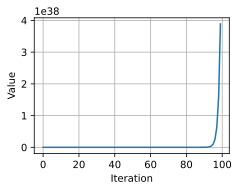

In [4]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

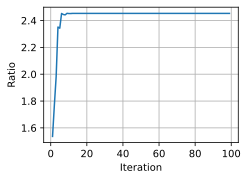

In [5]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

In [6]:
# Compute the eigenvalues
eigs = torch.eig(A)[0][:,0].tolist()
norm_eigs = [torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [tensor(0.3490), tensor(0.5691), tensor(0.5691), tensor(1.1828), tensor(2.4532)]


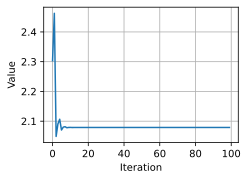

In [7]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

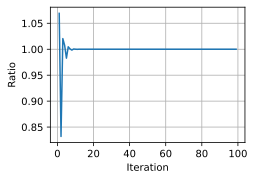

In [8]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')